In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import openpyxl as px

In [2]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [3]:
wb = px.load_workbook("AFRICA_jan26.xlsx")
sheet = wb["Sheet1"]

def cleaning_smile(Data): 
    df = pd.DataFrame(Data)
    for col in Data.columns: 
        if col.startswith("smile_") or col.startswith("income_"):
            cleaned_col = col.split(" ")[0]
            df = df.rename(columns={col : cleaned_col})
    return df

binary = {0 : 0, 1 : 0, 2 : 0, 3 : 1}

data= pd.read_excel("AFRICA_jan26.xlsx", sheet_name='Sheet1')
df = cleaning_smile(data)

df['GAD7_SEVERIDADE SINTOMAS']=df["GAD7_SEVERIDADE SINTOMAS"].map(binary)
severe_gad7_indexes = df[df['GAD7_SEVERIDADE SINTOMAS'] == 1].index.tolist()
df=df.drop(columns=['GAD7_SEVERIDADE SINTOMAS'])

sexual_dicotomico_indexes = df[df['SEXUAL DICOTOMICO '] == 1].index.tolist()
gender_dicotomico_indexes = df[df['GENDER DICOTOMICO '] == 1].index.tolist()

In [4]:
def clean_smile_column_suffix(col_name):
    """
    Remove content after the second underscore in smile column names.
    Expected format: smile_{number}_{x}
    Returns: smile_{number}
    Example: smile_2_abc -> smile_2
    """
    if col_name.startswith("smile_"):
        parts = col_name.split("_")
        if len(parts) >= 3:
            return "_".join(parts[:2])  # Keep only smile and number
    return col_name
df=df.drop(columns=['country_code', 'global_id','CONTINENT_CODE_INT', "GENDER DICOTOMICO ", "SEXUAL DICOTOMICO ", 
           "ethnic_group_2", "bmi", "SMILE", "INCOME PERCENTILE"])
df=df.drop(columns=['score_food_smile', 'score_subs_smile', 'score_PA_smile', 'score_stress_smile', 
           'score_sleep_smile', 'score_social_smile', 'score_envir_smile', 'scoretot_smile'])

map = {
       "ETNIA/PRETO X NÃO PRETO" : "black vs non-black"}

df.columns = df.columns.map(clean_smile_column_suffix)
df = df.rename(columns=map)
df.describe()

,age,SEXO,gender_identity,sexual_orientation,black vs non-black,bmi_classificação,marital_status,student_accommodation,work,INCOME CLASSIFICAÇÃO,smile_2,smile_3,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43,sedentary_behavior 1,sedentary_behavior 2,GAD7_class Ansiedade
count,501.000000,500.000000,495.000000,500.000000,499.000000,489.000000,501.000000,496.000000,498.000000,257.000000,499.000000,499.000000,501.000000,501.000000,501.000000,500.000000,501.000000,501.000000,499.000000,498.000000,499.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,500.00000,501.000000,501.000000,501.00000,500.000000,499.000000,498.000000,499.000000,500.000000,501.000000
mean,20.465070,0.510000,1.058586,1.316000,0.142285,1.443763,1.996008,1.711694,1.869478,2.957198,2.679359,2.378758,3.367265,3.586826,3.888224,3.916000,3.860279,2.640719,2.440882,3.271084,2.440882,3.598802,2.828343,3.081836,2.732535,3.473054,3.215569,3.28600,3.033932,3.317365,2.04990,1.872000,2.557114,3.074297,2.458918,1.906000,0.177645
std,2.895044,0.500401,0.328476,1.013014,0.349692,0.795355,0.167284,0.453432,0.337216,1.423202,1.128934,0.895566,0.782845,0.776496,0.501479,0.425801,0.558963,0.898142,1.055685,0.915333,1.184747,0.785314,0.970812,0.965033,1.102869,0.825695,0.955739,0.99508,1.075568,0.842068,0.98565,0.962012,1.102318,0.989127,1.233654,1.005578,0.382595
min,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000,3.000000,1.00000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.00000,3.000000,4.000000,2.00000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,22.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,3.00000,2.000000,4.000000,4.000000,3.000000,2.000000,0.000000
max,33.000000,1.000000,3.000000,5.000000,1.000000,3.000000,5.000000,2.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,5.000000,5.000000,1.000000


In [5]:
X = df.drop(columns=['GAD7_class Ansiedade'])
y = df["GAD7_class Ansiedade"]

valid_mask = y.notna()
X = X.loc[valid_mask]
y = y.loc[valid_mask]

if y.isna().any():
    raise ValueError("y contains NaN values after filtering.")

data_idx = X.index.to_numpy()

In [6]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline

shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=50)
splits = []

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'black vs non-black', 'student_accommodation', 'work']  

num = ['age', 'bmi_classificação', 'INCOME CLASSIFICAÇÃO', 'sedentary_behavior 1', 'sedentary_behavior 2', 'smile_2','smile_3', 
       'smile_5', 'smile_8', 'smile_9', 'smile_10', 'smile_11', 'smile_12', 'smile_13', 'smile_15', 
       'smile_17', 'smile_19', 'smile_25', 'smile_27', 'smile_28', 'smile_30', 'smile_31', 'smile_32', 
       'smile_34', 'smile_37', 'smile_40', 'smile_41', 'smile_42', 'smile_43']

# Pipeline for categorical: impute first, then one-hot encode
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

# Pipeline for numerical: impute first, then scale
numerical_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=1)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_pipeline, one_hotted),
        ("num", numerical_pipeline, num),
    ],
    remainder="passthrough"
)

for train_pos, test_pos in shuffle_split.split(data_idx):
    train_idx = data_idx[train_pos]
    test_idx = data_idx[test_pos]

    X_train, X_test_og = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test_og)
    
    # Get feature names from the preprocessor
    onehot_encoder = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    onehot_names = onehot_encoder.get_feature_names_out(one_hotted)
    scaled_names = num
    remaining = [col for col in X_train.columns if col not in one_hotted + num]

    all_feature_names = np.concatenate([onehot_names, scaled_names, remaining])

    X_train_imputed = pd.DataFrame(X_train_transformed, index=X_train.index, columns=all_feature_names)
    X_test_imputed = pd.DataFrame(X_test_transformed, index=X_test_og.index, columns=all_feature_names)

    splits.append({
        "X_train": X_train_imputed,
        "X_test": X_test_imputed,
        "y_train": y_train,
        "y_test": y_test
    })
    
print(f"Treino: {splits[0]['X_train'].shape}, Teste: {splits[0]['X_test'].shape}")

Treino: (400, 48), Teste: (101, 48)


In [7]:
splits[0]['X_train'].describe()

,marital_status_1.0,marital_status_2.0,marital_status_5.0,gender_identity_1.0,gender_identity_2.0,gender_identity_3.0,sexual_orientation_1.0,sexual_orientation_2.0,sexual_orientation_3.0,sexual_orientation_4.0,sexual_orientation_5.0,SEXO_0.0,SEXO_1.0,black vs non-black_0.0,black vs non-black_1.0,student_accommodation_1.0,student_accommodation_2.0,work_1.0,work_2.0,age,bmi_classificação,INCOME CLASSIFICAÇÃO,sedentary_behavior 1,sedentary_behavior 2,smile_2,smile_3,smile_5,smile_8,smile_9,smile_10,smile_11,smile_12,smile_13,smile_15,smile_17,smile_19,smile_25,smile_27,smile_28,smile_30,smile_31,smile_32,smile_34,smile_37,smile_40,smile_41,smile_42,smile_43
count,400.000000,400.000000,400.0000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.0000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,0.007500,0.990000,0.0025,0.97500,0.007500,0.017500,0.892500,0.010000,0.02500,0.0025,0.070000,0.50750,0.49250,0.865000,0.135000,0.302500,0.697500,0.130000,0.870000,5.395684e-16,3.552714e-17,-1.643130e-16,9.325873e-17,-2.886580e-17,1.332268e-16,1.332268e-17,1.154632e-16,7.549517e-17,-2.664535e-16,1.820766e-16,-1.332268e-16,-2.220446e-17,-1.776357e-17,-1.215694e-16,1.176836e-16,-1.865175e-16,-6.661338e-17,-1.021405e-16,2.220446e-18,-8.881784e-18,2.287059e-16,-6.883383e-17,2.220446e-17,-2.531308e-16,1.154632e-16,-3.108624e-17,-7.771561e-17,4.884981e-17
std,0.086385,0.099623,0.0500,0.15632,0.086385,0.131289,0.310136,0.099623,0.15632,0.0500,0.255467,0.50057,0.50057,0.342152,0.342152,0.459916,0.459916,0.336725,0.336725,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.552908e+00,-1.828749e+00,-1.363888e+00,-1.198682e+00,-8.993828e-01,-1.498540e+00,-1.567857e+00,-2.972377e+00,-3.255519e+00,-5.804430e+00,-7.111383e+00,-5.416498e+00,-1.817735e+00,-1.339839e+00,-2.465338e+00,-1.264028e+00,-3.356586e+00,-1.836506e+00,-2.188141e+00,-1.524504e+00,-3.050762e+00,-2.279820e+00,-2.245325e+00,-1.826128e+00,-2.711652e+00,-1.072631e+00,-9.058833e-01,-1.381499e+00,-2.085141e+00
25%,0.000000,1.000000,0.0000,1.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.611897e-01,-5.825828e-01,-6.562939e-01,-3.914888e-01,-8.993828e-01,-6.038893e-01,-4.459559e-01,-4.534134e-01,-7.171027e-01,2.209299e-01,1.948324e-01,2.404190e-01,-7.127289e-01,-1.339839e+00,-2.908393e-01,-1.264028e+00,-7.745967e-01,-8.090899e-01,-1.136150e+00,-6.224304e-01,-5.879874e-01,-2.025352e-01,-2.670651e-01,-9.142037e-01,-3.562539e-01,-1.072631e+00,-9.058833e-01,-4.829632e-01,-1.075387e+00
50%,0.000000,1.000000,0.0000,1.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.0000,0.000000,1.00000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.694711e-01,-5.825828e-01,5.130060e-02,-3.914888e-01,8.087094e-02,2.907615e-01,-4.459559e-01,8.060684e-01,5.521056e-01,2.209299e-01,1.948324e-01,2.404190e-01,3.922772e-01,-4.077770e-01,7.964103e-01,4.355053e-01,5.163978e-01,2.183258e-01,-8.415925e-02,2.796427e-01,6.433998e-01,-2.025352e-01,7.220648e-01,-2.279810e-03,8.214449e-01,-7.017

XGBoost

In [15]:
def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs
    
    params={'max_depth': 5, 'learning_rate': np.float64(0.03305486342407529), 'subsample': np.float64(0.8893193614697442), 
            'colsample_bytree': np.float64(0.9383840003489344), 'min_child_weight': 8, 'reg_alpha': np.float64(0.000186375736310017), 
            'reg_lambda': np.float64(0.7192901084136052), 'n_estimators': 275}

    xgb_clf = XGBClassifier(tree_method="hist", device="cpu", random_state=42)
    
    xgb_clf.fit(X_train_rs, y_train_rs)
    predictions = xgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(xgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.091, Recall: 0.482, F1-Score: 0.480


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.333, Recall: 0.523, F1-Score: 0.508


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.333, Recall: 0.553, F1-Score: 0.559


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.500, Recall: 0.601, F1-Score: 0.618


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.214, Recall: 0.512, F1-Score: 0.511
Average Precision: 0.294
Average Recall: 0.534
Average F1-Score: 0.535


Random Forest

In [16]:
one_hotted = ["marital_status", "gender_identity", 
              "sexual_orientation", 'sex', 'student_accommodation', 'work']  

def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

acc_list = []
recall_list = []
all_y_true = []
all_predictions = []
all_shap_values = []
prec_list = []
recall_list = []
f1_list = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']
    
    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    xgb_clf = RandomForestClassifier(random_state=42)
    
    xgb_clf.fit(X_train_rs, y_train_rs)
    predictions = xgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(xgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.000, Recall: 0.489, F1-Score: 0.460


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.667, Recall: 0.541, F1-Score: 0.527


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.333, Recall: 0.518, F1-Score: 0.501


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.600, Recall: 0.567, F1-Score: 0.574


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.667, Recall: 0.547, F1-Score: 0.541
Average Precision: 0.453
Average Recall: 0.532
Average F1-Score: 0.521


Light GBM

In [17]:
def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name

import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']
    
    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    #params={'num_leaves': 41, 'max_depth': 5, 'learning_rate': np.float64(0.023073379290271694), 'min_child_samples': 21, 
    #       'subsample': np.float64(0.9176911552334515), 'colsample_bytree': np.float64(0.7551713986065799), 
    #       'reg_alpha': np.float64(7.789298601896892), 'reg_lambda': np.float64(0.0002610089669219575), 'n_estimators': 500}
    
    lgb_clf = lgb.LGBMClassifier(
        random_state=42,
        class_weight='balanced',
    #    **params, 
        verbose=-1
    )
    
    lgb_clf.fit(X_train_rs, y_train_rs)
    predictions = lgb_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.TreeExplainer(lgb_clf)
    shap_values = explainer.shap_values(X_test, check_additivity=False)
    for SHAPs in shap_values:
        all_shap_values.append(SHAPs)

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.000, Recall: 0.483, F1-Score: 0.457


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.500, Recall: 0.535, F1-Score: 0.521


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.286, Recall: 0.529, F1-Score: 0.527


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.571, Recall: 0.587, F1-Score: 0.603


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.250, Recall: 0.524, F1-Score: 0.524
Average Precision: 0.321
Average Recall: 0.532
Average F1-Score: 0.526


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


SVM

In [18]:
one_hotted = ["marital_status", "gender_identity", 
              "sexual_orientation", 'sex', 'student_accommodation', 'work'] 

def one_hot_agg(name):
    for prefix in one_hotted:
        if name.startswith(prefix):
            return prefix
    return name
import matplotlib.pyplot as plt
import shap
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC  # Changed import
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []
all_X_tests = []

params={'C': np.float64(0.6574156904259764), 'kernel': 'rbf', 'gamma': np.float64(0.000706103668717237), 'degree': 3, 'class_weight': 'balanced'}
for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs

    svm_clf = SVC(random_state=42, probability=True)
    
    svm_clf.fit(X_train_rs, y_train_rs)
    predictions = svm_clf.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    
    background_sample = shap.sample(X_train_rs, min(50, len(X_train_rs)))
    explainer = shap.KernelExplainer(svm_clf.predict_proba, background_sample)
    
    X_test_sample = X_test if len(X_test) <= 100 else X_test.sample(n=100, random_state=42)
    shap_values = explainer.shap_values(X_test_sample, nsamples=100)
    
    if isinstance(shap_values, list):
        shap_array = shap_values[1]
    elif isinstance(shap_values, np.ndarray):
        if shap_values.ndim == 3:
            shap_array = shap_values[:, :, 1]
        elif shap_values.ndim == 2:
            shap_array = shap_values
        else:
            raise ValueError(f"Unexpected SHAP values shape: {shap_values.shape}")
    else:
        shap_array = shap_values
    if shap_array.ndim != 2:
        raise ValueError(f"SHAP array must be 2D, got shape: {shap_array.shape}")
    
    shap_df_split = pd.DataFrame(shap_array, index=X_test_sample.index, columns=X_test_sample.columns)
    
    all_shap_values.append(shap_df_split)
    all_X_tests.append(X_test_sample.copy())

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))

/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.091, Recall: 0.482, F1-Score: 0.480


100%|██████████| 100/100 [01:16<00:00,  1.31it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.600, Recall: 0.677, F1-Score: 0.696


100%|██████████| 100/100 [01:04<00:00,  1.55it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 3 -- Precision: 0.300, Recall: 0.547, F1-Score: 0.551


100%|██████████| 100/100 [00:57<00:00,  1.73it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 4 -- Precision: 0.455, Recall: 0.595, F1-Score: 0.609


100%|██████████| 100/100 [00:58<00:00,  1.71it/s]
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.400, Recall: 0.603, F1-Score: 0.611


100%|██████████| 100/100 [01:00<00:00,  1.65it/s]

Average Precision: 0.369
Average Recall: 0.581
Average F1-Score: 0.589


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_60149/1496032201.py:43: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()


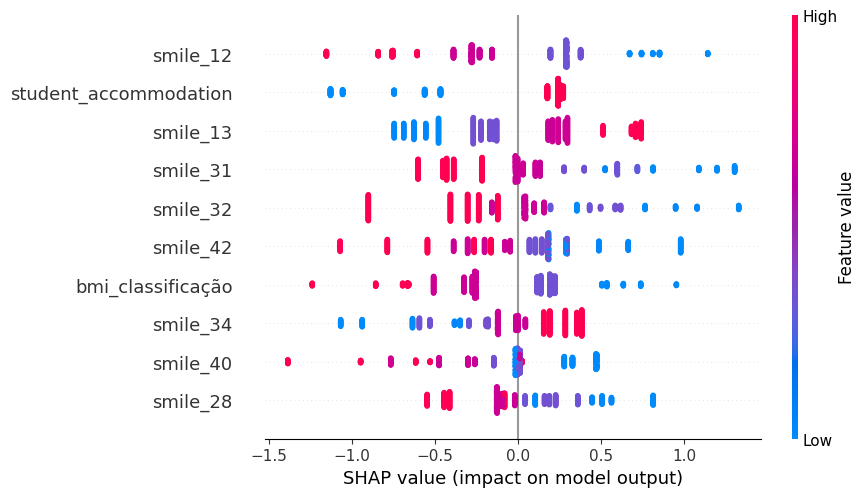

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'black vs non-black', 'student_accommodation', 'work']

def aggregate_features(feature_name):
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

# Use all_X_tests from the model cell instead of split['X_test']
for i in range(len(all_shap_values)):
    X_test = all_X_tests[i].copy()
    
    shap_vals = all_shap_values[i]
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()
X_test_agg_list = []

for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_all.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        # Get the argmax (original category index)
        argmax_values = X_test_all[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_all[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_all[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_all.index
)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

if 'gender_identity' in X_test_agg.columns:
    X_test_agg['gender_identity'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(expl, max_display=10, group_remaining_features=False)
plt.tight_layout()
plt.show()

/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_60149/988602998.py:74: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()


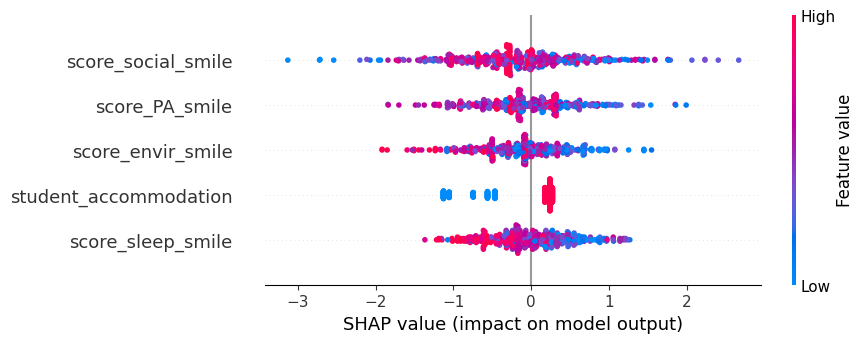

<Figure size 640x480 with 0 Axes>

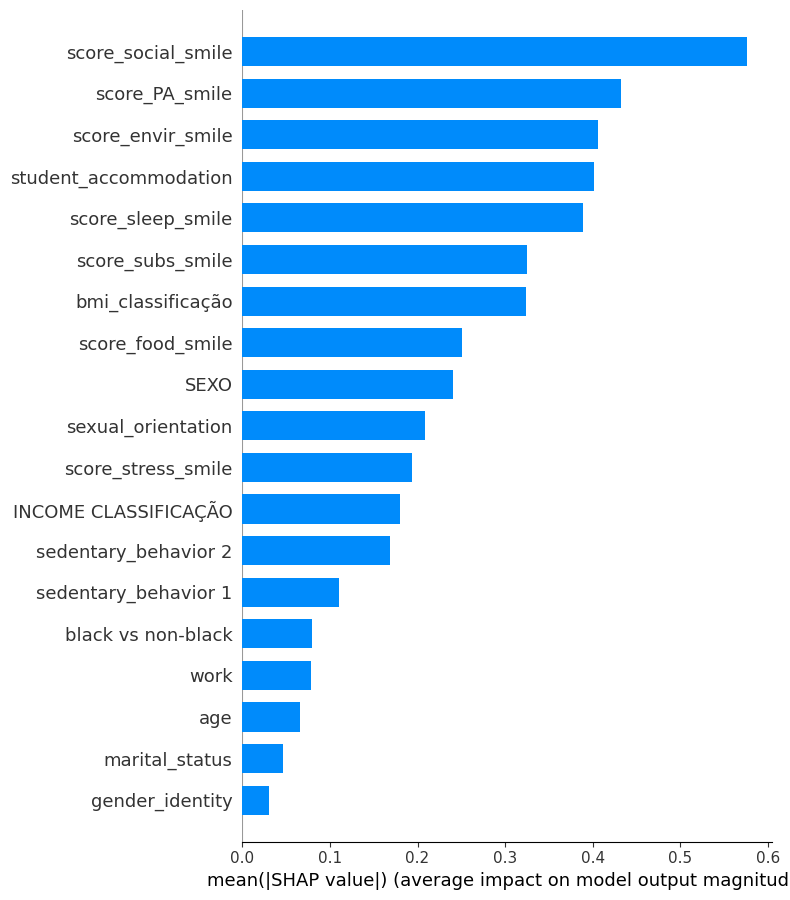

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'black vs non-black', 'student_accommodation', 'work']  

smile_variable_groups = {
    "score_food_smile": [
        "smile_2", "smile_3", "smile_5"
    ],
    "score_subs_smile": [
        "smile_8", "smile_9", "smile_10", "smile_11"
    ],
    "score_PA_smile": [
        "smile_12", "smile_13", "smile_15"
    ],
    "score_stress_smile": [
        "smile_17", "smile_19"
    ],
    "score_sleep_smile": [
        "smile_25", "smile_27", "smile_28", "smile_41"
    ],
    "score_social_smile": [
        "smile_30", "smile_31", "smile_32", "smile_34", "smile_37"
    ],
    "score_envir_smile": [
        "smile_40", "smile_42", "smile_43"
    ]
}

feature_to_group_map = {}
for group_name, features in smile_variable_groups.items():
    for feature in features:
        feature_to_group_map[feature] = group_name

def aggregate_features(feature_name):
    if feature_name in feature_to_group_map:
        return feature_to_group_map[feature_name]
    
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i in range(len(all_shap_values)):
    X_test = all_X_tests[i].copy()
    
    shap_vals = all_shap_values[i]
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

shap_df_agg = shap_df_all.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_all.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_all[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_all[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_all[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_all.index
)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

if 'gender_identity' in X_test_agg.columns:
    X_test_agg['gender_identity'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

shap.plots.beeswarm(expl, max_display=5, group_remaining_features=False)
plt.tight_layout()
plt.show()
plt.close()

shap.summary_plot(
    shap_df_agg[common_columns].values, 
    X_test_agg[common_columns],
    plot_type="bar",
    feature_names=common_columns,
    show=False
)
plt.tight_layout()
plt.show()

SHAP - casos graves

Total de amostras: 505
Amostras GAD7 graves: 33


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_60149/473253620.py:50: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()


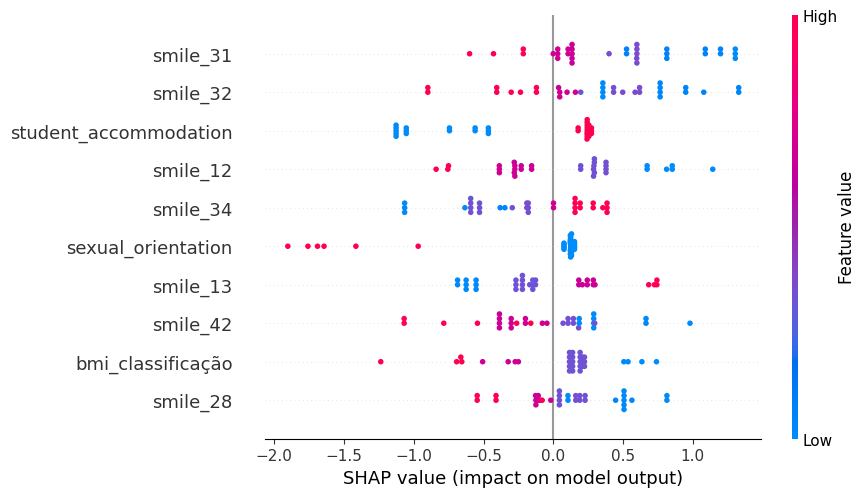

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'black vs non-black', 'student_accommodation', 'work']  

def aggregate_features(feature_name):
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i in range(len(all_shap_values)):
    X_test = all_X_tests[i].copy()
    
    shap_vals = all_shap_values[i]
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

# Filtra apenas casos graves de GAD7
severe_mask = shap_df_all.index.isin(severe_gad7_indexes)
shap_df_severe = shap_df_all.loc[severe_mask]
X_test_severe = X_test_all.loc[severe_mask]

print(f"Total de amostras: {len(shap_df_all)}")
print(f"Amostras GAD7 graves: {len(shap_df_severe)}")

shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_severe.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_severe[group_cols].values.argmax(axis=1)
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_severe[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_severe[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_severe.index
)

# Make gender and sexual_orientation binary using stored indexes
if 'gender' in X_test_agg.columns:
    X_test_agg['gender'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

shap.plots.beeswarm(expl, max_display=10, group_remaining_features=False)
plt.tight_layout()
plt.show()

Total de amostras: 505
Amostras GAD7 graves: 33


/var/folders/ft/fz7nfx4x3l738bpb762dm8jr0000gn/T/ipykernel_60149/777575680.py:82: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()


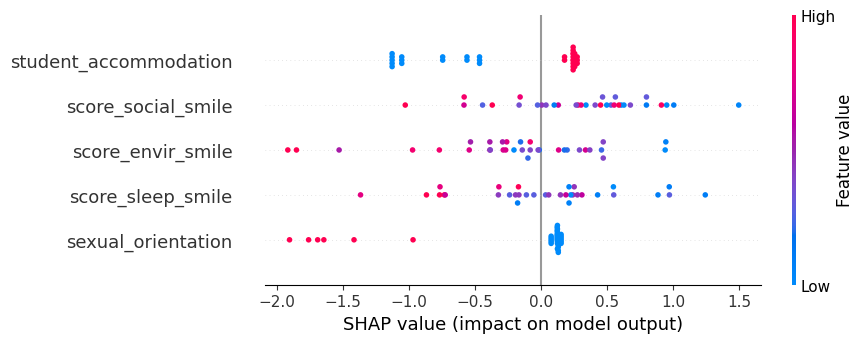

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

one_hotted = ["marital_status", "gender_identity", "sexual_orientation", 
              'SEXO', 'black vs non-black', 'student_accommodation', 'work']  

smile_variable_groups = {
    "score_food_smile": [
        "smile_2", "smile_3", "smile_5", "score_food_smile"
    ],
    "score_subs_smile": [
        "smile_8", "smile_9", "smile_10", "smile_11", "score_subs_smile"
    ],
    "score_PA_smile": [
        "smile_12", "smile_13", "smile_15", "score_PA_smile"
    ],
    "score_stress_smile": [
        "smile_17", "smile_19", "score_stress_smile"
    ],
    "score_sleep_smile": [
        "smile_25", "smile_27", "smile_28", "smile_41", "score_sleep_smile"
    ],
    "score_social_smile": [
        "smile_30", "smile_31", "smile_32", "smile_34", "smile_37", "score_social_smile"
    ],
    "score_envir_smile": [
        "smile_40", "smile_42", "smile_43", "score_envir_smile"
    ]
}

feature_to_group_map = {}
for group_name, features in smile_variable_groups.items():
    for feature in features:
        feature_to_group_map[feature] = group_name

def aggregate_features(feature_name):
    if feature_name in feature_to_group_map:
        return feature_to_group_map[feature_name]
    
    for prefix in one_hotted:
        if feature_name.startswith(prefix):
            return prefix
            
    return feature_name

all_shap_list = []
all_X_test_list = []

for i in range(len(all_shap_values)):
    X_test = all_X_tests[i].copy()
    
    shap_vals = all_shap_values[i]
    if isinstance(shap_vals, shap.Explanation):
        shap_array = shap_vals.values
    elif isinstance(shap_vals, list):
        shap_array = shap_vals[1] if len(shap_vals) > 1 else shap_vals[0]
    elif isinstance(shap_vals, pd.DataFrame):
        shap_array = shap_vals.values
    else:
        shap_array = np.asarray(shap_vals)
        if shap_array.ndim == 3:
            shap_array = shap_array[:, :, 1]
    
    shap_df = pd.DataFrame(shap_array, columns=X_test.columns, index=X_test.index)
    
    all_shap_list.append(shap_df)
    all_X_test_list.append(X_test)

shap_df_all = pd.concat(all_shap_list, axis=0, ignore_index=False)
X_test_all = pd.concat(all_X_test_list, axis=0, ignore_index=False)

# Filtra apenas casos graves de GAD7
severe_mask = shap_df_all.index.isin(severe_gad7_indexes)
shap_df_severe = shap_df_all.loc[severe_mask]
X_test_severe = X_test_all.loc[severe_mask]

print(f"Total de amostras: {len(shap_df_all)}")
print(f"Amostras GAD7 graves: {len(shap_df_severe)}")

shap_df_agg = shap_df_severe.groupby(aggregate_features, axis=1).sum()

X_test_agg_list = []
for col_group in shap_df_agg.columns:
    group_cols = [c for c in X_test_severe.columns if aggregate_features(c) == col_group]
    
    is_onehot = any(col_group == prefix for prefix in one_hotted)
    
    if len(group_cols) > 1 and is_onehot:
        argmax_values = X_test_severe[group_cols].values.argmax(axis=1)
    
        X_test_agg_list.append(argmax_values)
    elif len(group_cols) > 1:
        X_test_agg_list.append(X_test_severe[group_cols].mean(axis=1).values)
    else:
        X_test_agg_list.append(X_test_severe[col_group].values)

X_test_agg = pd.DataFrame(
    np.column_stack(X_test_agg_list),
    columns=shap_df_agg.columns,
    index=X_test_severe.index
)

# Make gender and sexual_orientation binary using stored indexes
if 'gender' in X_test_agg.columns:
    X_test_agg['gender'] = X_test_agg.index.isin(gender_dicotomico_indexes).astype(int)

if 'sexual_orientation' in X_test_agg.columns:
    X_test_agg['sexual_orientation'] = X_test_agg.index.isin(sexual_dicotomico_indexes).astype(int)

common_columns = list(shap_df_agg.columns)
X_test_agg = X_test_agg[common_columns]

expl = shap.Explanation(
    values=shap_df_agg.values,
    data=X_test_agg.values,
    feature_names=common_columns
)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(expl, max_display=5, group_remaining_features=False)
plt.tight_layout()
plt.show()
plt.close()

In [20]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.svm import SVC  # Changed from LogisticRegression
from sklearn.metrics import recall_score

try:
    smote
except NameError:
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

# --- MODIFICATION 1: Define a new search space for SVC ---
kernel_options = ['linear', 'rbf', 'poly']
class_weight_options = [None, 'balanced']
degree_options = [2, 3, 4] # Relevant only for 'poly' kernel

search_space = {
    'C': hp.loguniform('C', np.log(1e-3), np.log(10.0)),
    'kernel': hp.choice('kernel', kernel_options),
    'gamma': hp.loguniform('gamma', np.log(1e-4), np.log(1.0)), # For 'rbf' and 'poly'
    'degree': hp.choice('degree', degree_options), # For 'poly'
    'class_weight': hp.choice('class_weight', class_weight_options),
}

# --- MODIFICATION 2: Update the objective function for SVC ---
def objective(params):
    recalls = []
    # SVC will automatically ignore irrelevant parameters (e.g., 'gamma' for a linear kernel)
    for split in splits:
        X_train_rs, y_train_rs = split['X_train_rs'], split['y_train_rs']
        X_test, y_test = split['X_test'], split['y_test']

        # Instantiate and train the SVC model
        model = SVC(
            C=params['C'],
            kernel=params['kernel'],
            gamma=params['gamma'],
            degree=params['degree'],
            class_weight=params['class_weight'],
            random_state=42
        )
        model.fit(X_train_rs, y_train_rs)
        preds = model.predict(X_test)
        recalls.append(recall_score(y_test, preds, average='macro'))

    mean_recall = np.mean(recalls)
    # We negate recall because hyperopt minimizes the loss
    return {'loss': -mean_recall, 'status': STATUS_OK}

# The fmin call remains the same
trials = Trials()
best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials,
    rstate=np.random.default_rng(42)
)

loss_values = [loss for loss in trials.losses() if loss is not None]
best_recall = -min(loss_values)

# --- MODIFICATION 3: Reconstruct the best parameter set for SVC ---
best_params = {
    'C': best['C'],
    'kernel': kernel_options[best['kernel']],
    'gamma': best['gamma'],
    'degree': degree_options[best['degree']],
    'class_weight': class_weight_options[best['class_weight']],
}

print('Best params:', best_params)
print(f'Best cross-validated recall: {best_recall:.3f}')

100%|██████████| 40/40 [00:16<00:00,  2.37trial/s, best loss: -0.6142451365808045]
Best params: {'C': np.float64(0.6574156904259764), 'kernel': 'rbf', 'gamma': np.float64(0.000706103668717237), 'degree': 3, 'class_weight': 'balanced'}
Best cross-validated recall: 0.614


In [19]:
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

prec_list = []
recall_list = []
f1_list=[]
all_y_true = []
all_predictions = []
all_shap_values = []
all_X_tests = []

for i, split in enumerate(splits):

    X_train = split['X_train']
    X_test = split['X_test']
    y_train = split['y_train']
    y_test = split['y_test']

    X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
    split["X_train_rs"], split["y_train_rs"] = X_train_rs, y_train_rs
    params={'C': np.float64(0.11083349315152796), 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': None, 'max_iter': 1000}
    log_reg = LogisticRegression(random_state=42)

    log_reg.fit(X_train_rs, y_train_rs)
    predictions = log_reg.predict(X_test)

    prec = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    print(f"Split {i+1} -- Precision: {prec:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)

    all_y_true.extend(y_test)
    all_predictions.extend(predictions)

    explainer = shap.LinearExplainer(log_reg, X_train_rs)
    shap_values = explainer.shap_values(X_test)
    shap_df_split = pd.DataFrame(shap_values, index=X_test.index, columns=X_train.columns)

    all_shap_values.append(shap_df_split)
    all_X_tests.append(X_test.copy())

avg_prec = np.mean(prec_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Precision: {:.3f}".format(avg_prec))
print("Average Recall: {:.3f}".format(avg_recall))
print("Average F1-Score: {:.3f}".format(avg_f1))


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 1 -- Precision: 0.158, Recall: 0.549, F1-Score: 0.489


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 2 -- Precision: 0.282, Recall: 0.587, F1-Score: 0.550
Split 3 -- Precision: 0.154, Recall: 0.480, F1-Score: 0.456
Split 4 -- Precision: 0.294, Recall: 0.617, F1-Score: 0.578


/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/envs/lasos/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Split 5 -- Precision: 0.188, Recall: 0.499, F1-Score: 0.489
Average Precision: 0.215
Average Recall: 0.546
Average F1-Score: 0.512
